# Quora Question Pairs

중복 질문을 찾아서 이미 잘 작성된 답변들을 사용자들이 참고할 수 있도록 하자

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
DATA_DIR = './data/quora-question-pairs/'
TRAIN = 'train.csv'
TEST = 'test.csv'

In [3]:
train_data = pd.read_csv(os.path.join(DATA_DIR, TRAIN))
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
print('Size of File: ' )
for file in os.listdir(DATA_DIR):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_DIR + file) / 1000000, 2)) + 'MB')

Size of File: 
test.csv                      477.59MB
train.csv                     63.4MB
sample_submission.csv         22.35MB


In [5]:
print('Total Length of Training Dataset : ', len(train_data))

Total Length of Training Dataset :  404290


Order of Data Analysis
- 질문 중복 분석
- 레이블 빈도 분석
- 문자 분석
- 단어 분석

In [6]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [7]:
train_set[0]

'What is the step by step guide to invest in share market in india?'

In [8]:
train_set[1]

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [9]:
train_set[len(train_data) + 1]

'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?'

질문의 중복 여부 확인 필요

In [10]:
print('Training Dataset의 총 질문 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문 수 : {}'.format(np.sum(train_set.value_counts() > 1)))

Training Dataset의 총 질문 수 : 537361
반복해서 나타나는 질문 수 : 111873


Text(0, 0.5, 'Number of questions')

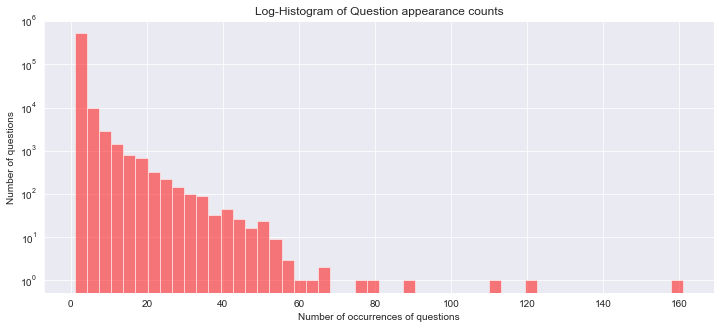

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
# plt.yscale('log', nonposy='clip')
plt.yscale('log')
plt.title('Log-Histogram of Question appearance counts')
plt.xlabel('Number of occurrences of questions')
plt.ylabel('Number of questions')

In [12]:
train_set.value_counts()

What are the best ways to lose weight?                                                    161
How can you look at someone's private Instagram account without following them?           120
How can I lose weight quickly?                                                            111
What's the easiest way to make money online?                                               88
Can you see who views your Instagram?                                                      79
                                                                                         ... 
Should I buy my iPhone from the Apple Store or from my cellphone service provider?          1
How much do toucans eat in a day? What do they eat?                                         1
Is it a logical move for Kiip.me to grow their business on the Mountain Lion platform?      1
Is Hla b27 curable?                                                                         1
What is it like to have sex with your cousin?               

중복 횟수가 1인 데이터가 가장 많고, 대부분 50번 이하

글괴 매우 큰 빈도를 가진 질문은 이상치가 될 거심

In [13]:
print('중복 최대 개수: ', np.max(train_set.value_counts()))
print('중복 최소 개수: ', np.min(train_set.value_counts()))
print('중복 평균 개수: ', np.mean(train_set.value_counts()))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 Median : ', np.median(train_set.value_counts()))
print('중복 Q1: ', np.percentile(train_set.value_counts(), 25))
print('중복 Q3: ', np.percentile(train_set.value_counts(), 75))

중복 최대 개수:  161
중복 최소 개수:  1
중복 평균 개수:  1.50472401234924
중복 표준편차: 1.91
중복 Median :  1.0
중복 Q1:  1.0
중복 Q3:  1.0


기초 집계함수와 Quartile로 미뤄 봤을 때 중복 개수가 엄청 많음

{'whiskers': [<matplotlib.lines.Line2D at 0x17d389700>,
 'caps': [<matplotlib.lines.Line2D at 0x17d389ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d389550>],
 'medians': [<matplotlib.lines.Line2D at 0x17d73a280>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d73a820>],
 'means': [<matplotlib.lines.Line2D at 0x17d73a550>]}

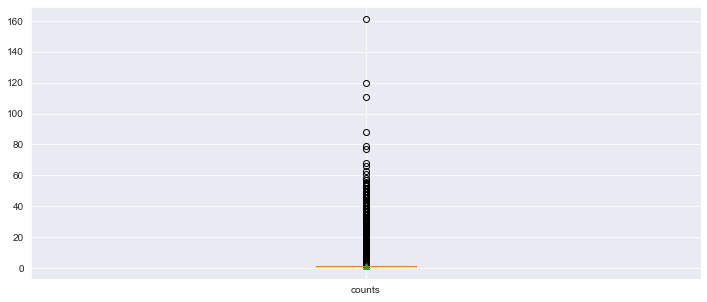

In [14]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans=True)

Word Cloud 확인

In [15]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

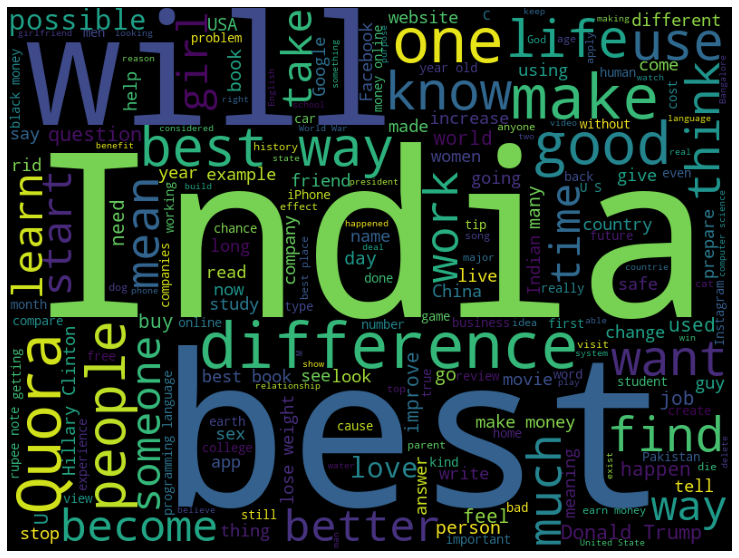

In [16]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

`is_duplicate` 확인

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

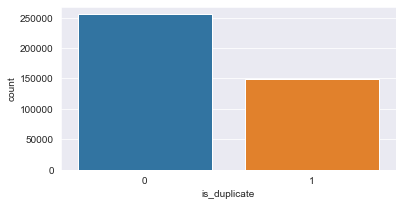

In [17]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['is_duplicate'])

불균형 처리 방안 추후 고민

텍스트 데이터 길이 분석 진행

In [18]:
train_length = train_set.apply(len)
train_length

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

Text(0, 0.5, 'Probability')

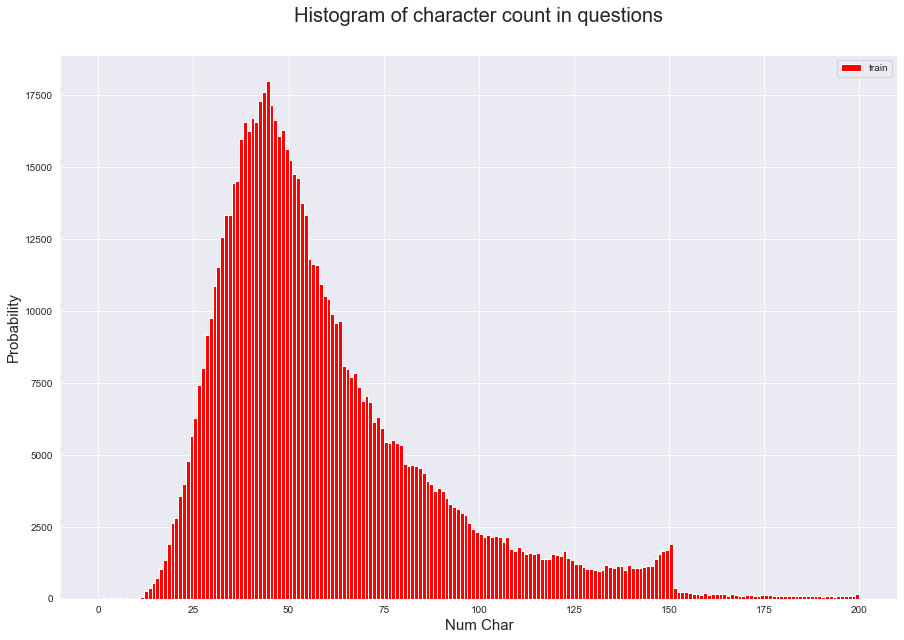

In [19]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', label='train')
plt.title("Histogram of character count in questions", y=1.05, fontsize=20)
plt.legend()
plt.xlabel('Num Char', fontsize=15)
plt.ylabel("Probability", fontsize=15)

In [20]:
print('질문 길이 최댓값: ', np.max(train_length))
print('질문 길이 평균값: ', np.mean(train_length))
print('질문 길이 STD: ', np.std(train_length))
print('질문 길이 MEDIAN: ', np.median(train_length))
print('질문 길이 Q1: ', np.percentile(train_length, 25))
print('질문 길이 Q3: ', np.percentile(train_length, 75))

질문 길이 최댓값:  1169
질문 길이 평균값:  59.82254817086745
질문 길이 STD:  31.963731729269114
질문 길이 MEDIAN:  51.0
질문 길이 Q1:  39.0
질문 길이 Q3:  72.0


평균과 최댓값의 차이가 매우 큼.. 이런 데이터는 제외하고 학습하는 것이 좋음
박스플롯을 확인해보자

{'whiskers': [<matplotlib.lines.Line2D at 0x17e945190>,
 'caps': [<matplotlib.lines.Line2D at 0x17e945610>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e91ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x17e945bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e91d190>],
 'means': [<matplotlib.lines.Line2D at 0x17e945e80>]}

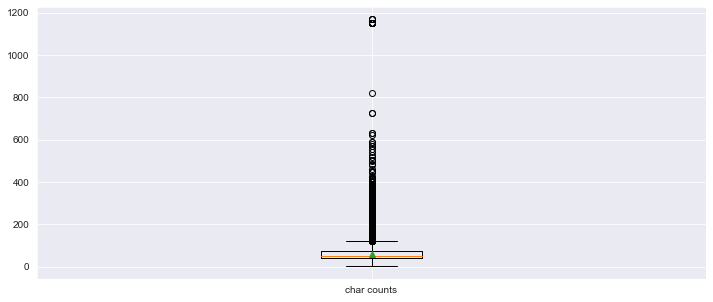

In [21]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length, labels=['char counts'], showmeans=True)

각 단어의 개수를 하나의 단위로 사용해 길이값을 분석해보자. 하나의 단어로 나누는 기준은 단순희 띄어쓰기로 정의하자.
각 데이터에 대한 단어의 개수를 담은 변수를 정의

In [22]:
train_word_counts = train_set.apply(lambda x: len(x.split(' ')))
train_word_counts

0         14
1          8
2         14
3         11
4         13
          ..
808575    13
808576     9
808577     3
808578    25
808579    10
Length: 808580, dtype: int64

Text(0, 0.5, 'Probability')

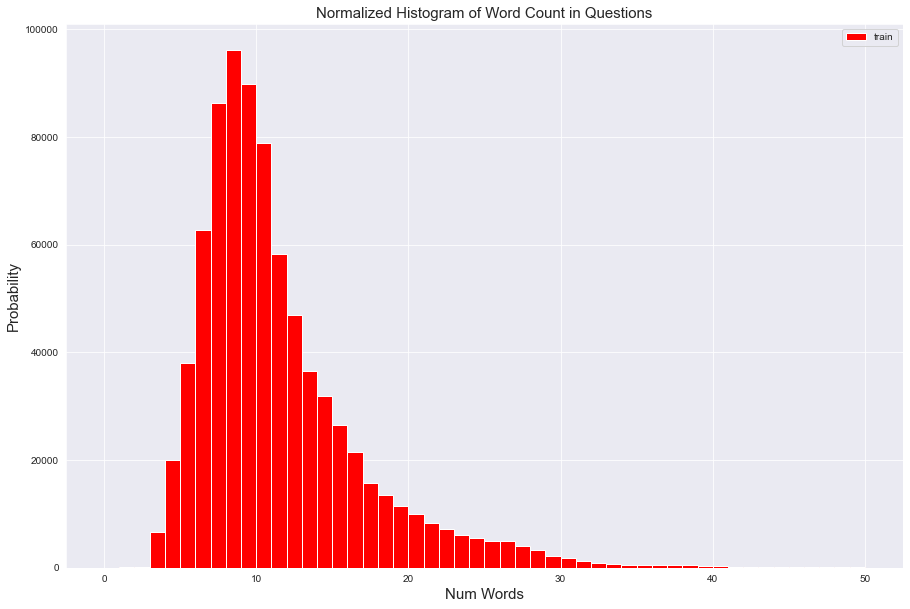

In [24]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', label='train')
plt.title('Normalized Histogram of Word Count in Questions', fontsize=15)
plt.legend()
plt.xlabel('Num Words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [26]:
print('질문 단어 개수 최댓값 :', np.max(train_word_counts))
print('질문 단어 개수 평균값 : ', np.mean(train_word_counts))
print('질문 단어 개수 STD : ', np.std(train_word_counts))
print('질문 단어 개수 median : ', np.median(train_word_counts))
print('질문 단어 개수 Q1 : ', np.percentile(train_word_counts, 25))
print('질문 단어 개수 Q3 : ', np.percentile(train_word_counts, 75))
print('질문 단어 개수 99퍼센트 : ', np.percentile(train_word_counts, 99))

질문 단어 개수 최댓값 : 237
질문 단어 개수 평균값 :  11.064855672908061
질문 단어 개수 STD :  5.889164008512441
질문 단어 개수 median :  10.0
질문 단어 개수 Q1 :  7.0
질문 단어 개수 Q3 :  13.0
질문 단어 개수 99퍼센트 :  31.0


이렇게 쿼리 데이터의 경우 이상치가 넓고 많이 분포돼 있음을 알수 있다.

마지막으로 몇 가지 특정 경우에 대한 비율을 확인해 볼 필요가 있음.

특수 문자 중 구두점, 물음표, 마침표가 사용된 비율과 수학 기호가 사용된 비율, 대/소문자의 비율을 확인

In [33]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표 구두점 확인
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
captial_first = np.mean(train_set.apply(lambda x: x[0].isupper())) # 첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자 몇 개

print('물음표 있는 질문 (%): ', qmarks*100)
print('수학 태그 있는 질문 (%): ', math*100)
print('마침표 있는 질문 (%): ', fullstop*100)
print('첫 글자 대문자 있는 질문 (%): ', captial_first*100)
print('대문자 있는 질문 (%): ', capitals*100)
print('숫자가 있는 질문 (%): ', numbers*100)

물음표 있는 질문 (%):  99.87385292735412
수학 태그 있는 질문 (%):  0.11736624700091518
마침표 있는 질문 (%):  6.308219347498083
첫 글자 대문자 있는 질문 (%):  99.81325286304386
대문자 있는 질문 (%):  99.95053055974672
숫자가 있는 질문 (%):  11.827153775755027


대문자가 첫 글자인 질문과 물음표를 동반하는 질문이 99% 이상을 차지
전체적으로 질문들이 물음표와 대문자로 된 첫 문자를 갖고 있음을 알 수 있음.

모든 질문이 보편적으로 갖고 있는 이 특징의 유지 여부에 대해서 생각해봐야함. 모두가 갖고 있는 보편적인 특징은 제거 필요.

질문 데이터의 중복 여부 분포, 라벨의 분포가 크게 차이나서 학습에 편향을 제공하여 좋지 않은 영향을 줄 수 있음.
따라서 전처리 과정에서 분포를 맞춰주는 것이 좋음. 그리고 대부분의 질문에 포함된 첫번째 대문자는 소문자로 통일한다. 물음표 같은 구두점은 삭제하는 식으로 보편적인 특성은 제거함으로써 필요한 부분만 학습하게 하는 이점을 얻을 수 있음.

## 데이터 전처리

In [34]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
DATA_PATH = './data/quora-question-pairs/'
TRAIN = 'train.csv'

In [36]:
train_data = pd.read_csv(DATA_PATH + TRAIN, encoding='utf-8')
train_data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### 1. 라벨 개수 처리
균형있게 맞춰야함. 중복이 아닌 데이터의 개수가 더 많았음. 이 경우에 해당하는 데이터의 개수를 줄인 후 분석을 진행.

In [37]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

train_neg_data = train_neg_data.sample(frac=sample_frac)

In [38]:
print('중복 질문 개수: {}'.format(len(train_pos_data)))
print('중복이 아닌 질문 개수: {}'.format(len(train_neg_data)))

중복 질문 개수: 149263
중복이 아닌 질문 개수: 149263


In [39]:
print(sample_frac)

0.5852831268846044


샘플링한 뒤 데이터의 개수가 동일해졌음. 이제 해당 데이터를 사용하면 균형 있게 학습할 수 있음. 우선 라벨에 따라 나눠진 데이터를 다시 하나로 합치자

In [40]:
train_data = pd.concat([train_neg_data, train_pos_data])

### 특수 문자 제거 & 소문자화

In [50]:
FILTERS = r'[^a-zA-Z0-9\s]'

In [51]:
change_filter = re.compile(FILTERS)

In [52]:
questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

In [53]:
questions1[:5]

['What universities does National Commerce recruit new grads from? What majors are they looking for?',
 'What are some things new employees should know going into their first day at Forest City Enterprises?',
 'Does copyright help or hinder innovation?',
 'What is global economy recession?',
 'What are the major activities included in logistics?']

In [54]:
for q in questions1:
    filtered_questions1.append(re.sub(change_filter, "", q).lower())

for q in questions2:
    filtered_questions2.append(re.sub(change_filter, "", q).lower())

In [55]:
filtered_questions1[:5]

['what universities does national commerce recruit new grads from what majors are they looking for',
 'what are some things new employees should know going into their first day at forest city enterprises',
 'does copyright help or hinder innovation',
 'what is global economy recession',
 'what are the major activities included in logistics']

### 토큰화

In [56]:
tokenizer = Tokenizer()

In [57]:
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

이렇게 생성한 토크나이징 객체를 두 질문 리스트에 적용해 각 질문을 토크나이징하고 단어들을 각 단어의 인덱스로 변환

In [58]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [63]:
print(questions1_sequence[:2])

[[2, 476, 21, 820, 2037, 1024, 73, 1137, 34, 2, 597, 11, 68, 491, 14], [2, 11, 25, 123, 73, 375, 30, 67, 174, 117, 83, 101, 124, 43, 4965, 550, 10945]]


In [65]:
MAX_SEQUENCE_LENGTH = 31  # 99%인 31로 설정 -> 이상치 불포함

q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [68]:
word_vocab = tokenizer.word_index
# word_vocab

word_vocab["<PAD>"] = 0
word_vocab["<PAD>"]

0

In [69]:
labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: ', q1_data.shape)
print('Shape of question2 data: ', q2_data.shape)
print('Shape of label: ', labels.shape)
print('Words in index: ', len(word_vocab))

Shape of question1 data:  (298526, 31)
Shape of question2 data:  (298526, 31)
Shape of label:  (298526,)
Words in index:  85362


In [70]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [71]:
data_configs

{'vocab': {'the': 1,
  'what': 2,
  'is': 3,
  'how': 4,
  'i': 5,
  'to': 6,
  'a': 7,
  'in': 8,
  'do': 9,
  'of': 10,
  'are': 11,
  'and': 12,
  'can': 13,
  'for': 14,
  'you': 15,
  'why': 16,
  'best': 17,
  'my': 18,
  'it': 19,
  'on': 20,
  'does': 21,
  'which': 22,
  'be': 23,
  'if': 24,
  'some': 25,
  'or': 26,
  'get': 27,
  'that': 28,
  'have': 29,
  'should': 30,
  'with': 31,
  'your': 32,
  'an': 33,
  'from': 34,
  'india': 35,
  'will': 36,
  'people': 37,
  'who': 38,
  'when': 39,
  'like': 40,
  'good': 41,
  'would': 42,
  'at': 43,
  'there': 44,
  'as': 45,
  'quora': 46,
  'about': 47,
  'between': 48,
  'most': 49,
  'one': 50,
  'way': 51,
  'not': 52,
  'we': 53,
  'make': 54,
  'did': 55,
  'by': 56,
  'life': 57,
  'where': 58,
  'money': 59,
  'was': 60,
  'any': 61,
  'so': 62,
  'me': 63,
  'after': 64,
  'time': 65,
  'learn': 66,
  'know': 67,
  'they': 68,
  'this': 69,
  'whats': 70,
  'difference': 71,
  'has': 72,
  'new': 73,
  'think': 74,

### 전처리 데이터 저장

In [72]:
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA = 'label_train.npy'
DATA_CONFIGS = 'data_configs.npy'

In [73]:
np.save(open(DATA_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(DATA_PATH + TRAIN_LABEL_DATA, 'wb'), labels)

json.dump(data_configs, open(DATA_PATH + DATA_CONFIGS, 'w'))

마찬가지로 test 데이터에 대해서도 똑같이 저장해주자

In [75]:
test_data = pd.read_csv(DATA_PATH + TEST, encoding='utf-8')
test_data

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_72526/952110602.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(DATA_PATH + TEST, encoding='utf-8')


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [76]:
valid_ids = [type(x) == int for x in test_data.test_id]
test_data = test_data[valid_ids].drop_duplicates()

In [77]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
    filtered_test_questions1.append(re.sub(change_filter, "", q).lower())

for q in test_questions2:
    filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [78]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

In [79]:
test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [80]:
test_id = np.array(test_data['test_id'])

print('Shape of test question1 data: ', test_q1_data.shape)
print('Shape of test question2 data: ', test_q2_data.shape)
print('Shape of IDs: ', test_id.shape)

Shape of test question1 data:  (2345796, 31)
Shape of test question2 data:  (2345796, 31)
Shape of IDs:  (2345796,)


In [81]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

In [82]:
np.save(open(DATA_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(DATA_PATH + TEST_ID_DATA, 'wb'), test_id)

## Modelling

텍스트 유사도 측정을 위한 모델링 구현.

세 개의 모델을 직접 구현
1. XGBoost
2. CNN
3. MaLSTM (맨해튼 디스턴스에 기반한 LSTM)